# CAPSTONE PROJECT - BEER AVAILABILITY IN CALGARY, CANADA - Week 1

## 1. Introduction:
Well-known for natural beauty of the close-by Rocky Mountains, the City of Calgary, Alberta, Canada, has also gone through transformation in terms of availability of beer in the last three decades. Historically, distribution and access to alcohol was limited and controlled by the government. In 1993, there were only 202 retail locations, so-called Alberta Liquor Control Board (ALCB) Liquor Stores in the entire province (Wikipedia) and many restaurants did not sell alcohol on Sundays. In 1993, following a provincial election, all ALCB liquor stores were quickly privatized and the industry experienced a major boom. The decision was controversial, due to its impact on both employment and alcohol availability. It is also true that, "In recent years disorderly conduct at and near licensed establishments was identified as a growing problem, particularly in the major cities. The province's economic boom and the resulting affluence of its youth were identified as the root cause of the increase in binge drinking" (Wikipedia).The objective of this Capstone Project is to explore Calgary communities to establish how available beer is in Calgary today, both in retail venues and in restaurants. 

This Capstone Project's objective, then, is to collect information available from public sources to collect information and perform an analysis of Calgary communities, identifying establishents holding Alcohol Beverage Sales License and Liquor Stores. This informatio will be pre-processed and subjected to clustering to identify and rank Calgary regions in terms of beer availability. This exercise does not intend to explore and rank quality of the beverages sold or served, as these preferences are highly subjective.

It is expected, that the downtown and University of Calgary areas are best-served in this respect, while bedroom communities in the suburbs are not. In addition, the results should provide the newcomer to Calgary with one bit of information that may be relevant when making the decision as to which community suits their needs best.



## 2. Data Section
Data Link: https://data.calgary.ca/Business-and-Economic-Activity/Calgary-Business-Licences/vdjc-pybd/data

The link has been obtained from City of Calgary pages and contains the list of all businesses legally operating in the City. 

The dataset contains data about all relevant establishments in all communities of Calgary, including locational information, such as tradename, address, status of Alcohol Beverage Sales license, geographic coordinates, etc. For the purpose of this exercise, i.e., exploring all relevant businesses, the selected dataset is deemed to serve the purpose best, as it can be relied on to contain an exhaustive list of relevant businesses.

Following review of the data and some pre-processing, the relevant data has been mapped out to obtain an overall perspective on draft beer availability in the City. While this overall review indicates the status quo, additional detail has been obtained through clustering. 

Initial data obtained from the Business License Register included the following information:

    1. Tradename
    2. Address
    3. License Type
    4. Community
    5. Status
    6. Date of Registration
    7. Address Longitude
    8. Address Latitude

Folium Maps:

Map of Calgary




## 3. Methodology Section

Clustering Approach:

To analyze the data obtained and pre-processed, clustering has been selected as the approach providing the most useful information. Communities with the largest and lowest number of locations have been identified and graphed and mapped out, then, for the purposes clustering, the data has been clened and simplified. Eight clusters has been determined as being the optimum and the method used was k-means.


## 4. Results Section

Map of Clusters in Calgary


List of all locations within clusters in Calgary


Ranking the Clusters


The Province of Alberta:

Alberta is a province in Western Canada. Its landscape encompasses mountains, prairies, desert badlands and vast coniferous forests. It has more than 600 lakes, and rich mineral deposits. In the west, the Canadian Rocky Mountain Parks have glaciers in the Columbia Icefields. The Waterton Glacier International Peace Park is a biosphere reserve that straddles the southern border with the USA (Wikipedia). Alberta's population was 4.371 million in 2019 (StatCan).

The City of Calgary:

Calgary is a cosmopolitan Alberta city with numerous skyscrapers which owes its rapid growth to its status as the centre of Canada’s oil industry. However, it’s still steeped in the western culture that earned it the nickname “Cowtown,” evident in the Calgary Stampede, its massive July rodeo and festival that grew out of the farming exhibitions once presented here.

Elevation: 1,045 m
Population: 1.514 million (2020 - www.statista.com)
Area code(s): 403, 587, 825

Calgary Business Licenses:
This Capstone project uses  the City of Calgary dataset collection as its prime data gathering source as it contains data on all legally operating businesess in the City and includes the licensed businesses in the City of Calgary. Data fields include: Trade name, Business Location, Creation Date, Status, Licence Type and Community District of the business.





## 5. Discussion Section

The objective of this project is to illustrate the impact on the society of changing the rules and provide basic information on the current situation. As mentioned previously, until 1994, there were only 202 liquor stores in the entire province, and, in Calgary, the bar community was represented primarily by "Electric Avenue", four blocks of two dozens of bars on 11 Ave, S.W.

The numbers show clearly that, even though the concept of liquor stores has been kept, deregulation of the industry has led to a boom - there are over 350 liquor stores in Calgary and the number of beer-serving places has gone well over 1,500. 


## 6. Conclusion Section

In this Capstone project k-means clustering was used to divide the City of Calgary into 8 clusters. The clusters vary from 103 (cluster 7) to 756 (cluster 1) venues.

The findings support the assumption that downtown houses the largest number of beer-serving establishments, while the bedroom communities in suburbs have the lowest number of the venues.

Future Works:

This Capstone Project could be used to develop a beer map of Calgary with more focus on quality aspect.

Libraries used:

Pandas: To create and manipulate dataframes.

Folium: To visualize the venues and cluster distribution of using interactive leaflet map.

Scikit Learn: To import k-means clustering.

JSON: To handle JSON files.

Geocoder: To retrieve Location Data.

Beautiful Soup and Requests: To scrap and library to handle http requests.

Matplotlib: To plot data.

GitHub Link of Complete Project : 





In [1425]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
!conda install -c conda-forge folium=0.5.0 --yes
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.1.3
Solving environment: done

# All requested packages already installed.

Libraries imported


In [1564]:
YYC_biz_df = pd.read_csv('https://raw.githubusercontent.com/jantyl56A/Coursera_Capstone/master/Calgary_Business_Licenses_Map.csv', sep=',', index_col=None)

#YYC_biz_df.columns

YYC_biz_df.head()

,TRADENAME,ADDRESS,LICENCETYPES,COMDISTNM,JOBSTATUSDESC,JOBCREATED,longitude,latitude
0,POLAR WINDOW OF CANADA,#103 3953 112 AV SE,RETAIL DEALER - PREMISES,EAST SHEPARD INDUSTRIAL,Pending Renewal,09/30/2013 12:00:00 AM,-113.980378,50.952254
1,JARVIS INTERIOR,4615 8A ST NE,CONTRACTOR,GREENVIEW INDUSTRIAL PARK,Pending Renewal,01/24/1995 12:00:00 AM,-114.042752,51.092998
2,WESTLAND APARTMENTS,4231 BOW TR SW,APARTMENT BUILDING OPERATOR (1 TO 3 STOREYS),ROSSCARROCK,Renewal Licensed,01/05/1998 12:00:00 AM,-114.148705,51.047190
3,RICKY'S ALL DAY GRILL,#1668 1632 14 AV NW,ALCOHOL BEVERAGE SALES (DRINKING EST/RESTAURANT),HOUNSFIELD HEIGHTS/BRIAR HILL,Renewal Licensed,09/03/2010 12:00:00 AM,-114.099809,51.065921
4,BLOWERS & GRAFTON,2120 4 ST SW,FOOD SERVICE - PREMISES (SEATING),MISSION,Licensed,07/10/2020 12:00:00 AM,-114.071253,51.033575


In [1565]:
YYC_biz_df.columns = ['Tradename', 'Address','License Type','Community','Status','Established', 'Longitude', 'Latitude']
YYC_biz_df.head(20)

,Tradename,Address,License Type,Community,Status,Established,Longitude,Latitude
0,POLAR WINDOW OF CANADA,#103 3953 112 AV SE,RETAIL DEALER - PREMISES,EAST SHEPARD INDUSTRIAL,Pending Renewal,09/30/2013 12:00:00 AM,-113.980378,50.952254
1,JARVIS INTERIOR,4615 8A ST NE,CONTRACTOR,GREENVIEW INDUSTRIAL PARK,Pending Renewal,01/24/1995 12:00:00 AM,-114.042752,51.092998
2,WESTLAND APARTMENTS,4231 BOW TR SW,APARTMENT BUILDING OPERATOR (1 TO 3 STOREYS),ROSSCARROCK,Renewal Licensed,01/05/1998 12:00:00 AM,-114.148705,51.047190
3,RICKY'S ALL DAY GRILL,#1668 1632 14 AV NW,ALCOHOL BEVERAGE SALES (DRINKING EST/RESTAURANT),HOUNSFIELD HEIGHTS/BRIAR HILL,Renewal Licensed,09/03/2010 12:00:00 AM,-114.099809,51.065921
4,BLOWERS & GRAFTON,2120 4 ST SW,FOOD SERVICE - PREMISES (SEATING),MISSION,Licensed,07/10/2020 12:00:00 AM,-114.071253,51.033575
5,TIM HORTONS,#500 8338 18 ST SE,RETAIL DEALER - PREMISES,RIVERBEND,Renewal Licensed,09/26/2019 12:00:00 AM,-114.015104,50.977481
6,DISCOVERY POINTE,1121 6 AV SW,APARTMENT BUILDING OPERATOR (4 OR MORE STOREYS),DOWNTOWN WEST END,Renewal Licensed,02/27/2019 12:00:00 AM,-114.087478,51.047883
7,PROALTA SERVICES,429 MANITOU RD SE,CONTRACTOR,MANCHESTER INDUSTRIAL,Pending Renewal,10/29/2013 12:00:00 AM,-114.054048,51.010203
8,MY DONAIR,#25 1200 37 ST SW,FOOD SERVICE - PREMISES (NO SEATING),ROSSCARROCK,Renewal Licensed,05/23/2008 12:00:00 AM,-114.140366,51.041643
9,SPECIAL EVENT RENTALS,#101 2312 52 AV SE,RETAIL DEALER - PREMISES,VALLEYFIELD,Renewal Licensed,11/30/2007 12:00:00 AM,-114.006146,51.007415


In [1566]:
YYC_biz_df['Community'].value_counts()

BELTLINE                         1578
DOWNTOWN COMMERCIAL CORE         1452
MANCHESTER INDUSTRIAL            1273
FOOTHILLS                        1130
EAST SHEPARD INDUSTRIAL           767
                                 ... 
CORNERSTONE                         1
TWINHILLS                           1
MEDICINE HILL                       1
MAYFAIR                             1
RESIDUAL WARD 2 - SUB AREA 2C       1
Name: Community, Length: 258, dtype: int64

In [1567]:
YYC_biz_df['License Type'].value_counts()
YYC_biz_df

,Tradename,Address,License Type,Community,Status,Established,Longitude,Latitude
0,POLAR WINDOW OF CANADA,#103 3953 112 AV SE,RETAIL DEALER - PREMISES,EAST SHEPARD INDUSTRIAL,Pending Renewal,09/30/2013 12:00:00 AM,-113.980378,50.952254
1,JARVIS INTERIOR,4615 8A ST NE,CONTRACTOR,GREENVIEW INDUSTRIAL PARK,Pending Renewal,01/24/1995 12:00:00 AM,-114.042752,51.092998
2,WESTLAND APARTMENTS,4231 BOW TR SW,APARTMENT BUILDING OPERATOR (1 TO 3 STOREYS),ROSSCARROCK,Renewal Licensed,01/05/1998 12:00:00 AM,-114.148705,51.047190
3,RICKY'S ALL DAY GRILL,#1668 1632 14 AV NW,ALCOHOL BEVERAGE SALES (DRINKING EST/RESTAURANT),HOUNSFIELD HEIGHTS/BRIAR HILL,Renewal Licensed,09/03/2010 12:00:00 AM,-114.099809,51.065921
4,BLOWERS & GRAFTON,2120 4 ST SW,FOOD SERVICE - PREMISES (SEATING),MISSION,Licensed,07/10/2020 12:00:00 AM,-114.071253,51.033575
...,...,...,...,...,...,...,...,...
32190,HELLO GORGEOUS SKIN LAB,#2 2507 14 ST SW,PERSONAL SERVICE,BANKVIEW,Renewal Licensed,05/07/2015 12:00:00 AM,-114.095188,51.031900
32191,SMARTECH COMPUTERS & PHOTO,#4101 230 EVERSYDE BV SW,PHOTOGRAPHER,EVERGREEN,Renewal Licensed,06/17/2016 12:00:00 AM,-114.110080,50.908448
32192,ANGLES HAIR & AESTHETICS,#13 1200 37 ST SW,PERSONAL SERVICE,ROSSCARROCK,Renewal Licensed,12/12/2007 12:00:00 AM,-114.139741,51.042287
32193,STEEL,#30 3260 46 AV SE,MANUFACTURER,GOLDEN TRIANGLE,Licensed,04/22/2020 12:00:00 AM,-113.987542,51.012677


In [1662]:
YYC_liq_df1=YYC_biz_df.loc[YYC_biz_df['License Type']=='LIQUOR STORE']
YYC_liq_df1

,Tradename,Address,License Type,Community,Status,Established,Longitude,Latitude
31,ZYN THE WINE MARKET,#100 1543 17 AV SE,LIQUOR STORE,ALYTH/BONNYBROOK,Pending Renewal,11/03/2008 12:00:00 AM,-114.027838,51.036524
40,CELLAR (THE),#100 137 8 AV SW,LIQUOR STORE,DOWNTOWN COMMERCIAL CORE,Pending Renewal,11/14/2001 12:00:00 AM,-114.065148,51.045335
65,SOBEYS SPIRITS WINE COLD BEER CRANSTON,#4010 356 CRANSTON RD SE,LIQUOR STORE,CRANSTON,Renewal Licensed,06/19/2009 12:00:00 AM,-113.976173,50.880257
188,SOMERSET LIQUOR STORE,16329 SOMERCREST ST SW,LIQUOR STORE,SOMERSET,Renewal Licensed,07/09/2004 12:00:00 AM,-114.090439,50.903410
212,BSW LIQUOR AVIATION,#134 425 AVIATION RD NE,LIQUOR STORE,CALGARY INTERNATIONAL AIRPORT,Pending Renewal,10/15/2019 12:00:00 AM,-114.030416,51.096781
...,...,...,...,...,...,...,...,...
31914,CANADIAN LIQUOR #3,#9 1603 62 AV SE,LIQUOR STORE,OGDEN,Renewal Licensed,09/09/2016 12:00:00 AM,-114.020153,50.997441
31918,ACE LIQUOR DISCOUNTER AT COUNTRY HILLS,#303 500 COUNTRY HILLS BV NE,LIQUOR STORE,COUNTRY HILLS VILLAGE,Renewal Licensed,01/10/2019 12:00:00 AM,-114.057230,51.155421
32030,LIQUOR BANK,#101 3509 17 AV SE,LIQUOR STORE,SOUTHVIEW,Renewal Licensed,12/01/2008 12:00:00 AM,-113.983785,51.037386
32060,A-Z LIQUOR STORE,11257 30 ST SW,LIQUOR STORE,CEDARBRAE,Renewal Licensed,05/04/2012 12:00:00 AM,-114.129842,50.953105


In [1569]:
YYC_liq_df2=YYC_biz_df.loc[YYC_biz_df['License Type']=='ALCOHOL BEVERAGE SALES (RESTAURANT)']
YYC_liq_df2 

,Tradename,Address,License Type,Community,Status,Established,Longitude,Latitude
11,RALLY POINTE,11511 35 ST SE,ALCOHOL BEVERAGE SALES (RESTAURANT),SHEPARD INDUSTRIAL,Renewal Licensed,01/10/2007 12:00:00 AM,-113.985855,50.947604
45,"NATIONAL FINE FOOD, BEER & SPIRITS (NATIONAL 1...",341 10 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),BELTLINE,Renewal Licensed,08/21/2012 12:00:00 AM,-114.070289,51.043270
130,GRAVITY ESPRESSO AND WINE BAR,908 13 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),BELTLINE,Pending Renewal,09/30/2019 12:00:00 AM,-114.082066,51.041590
141,LEOPOLD'S TAVERN,6512 BOWNESS RD NW,ALCOHOL BEVERAGE SALES (RESTAURANT),BOWNESS,Renewal Licensed,05/09/2018 12:00:00 AM,-114.182186,51.086814
185,STANLEY PARK LAWN BOWLING CLUB,350 42 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),PARKHILL,Pending Renewal,08/18/2008 12:00:00 AM,-114.069523,51.015875
...,...,...,...,...,...,...,...,...
32120,DEVILLE COFFEE,807 1 ST SW,ALCOHOL BEVERAGE SALES (RESTAURANT),DOWNTOWN COMMERCIAL CORE,Renewal Licensed,10/08/2018 12:00:00 AM,-114.065818,51.045355
32143,GOOD EARTH COFFEE HOUSE CENTENNIAL PLACE,#110 520 3 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),EAU CLAIRE,Renewal Licensed,05/22/2018 12:00:00 AM,-114.072113,51.050860
32145,SS106 APERITIVO BAR,824D EDMONTON TR NE,ALCOHOL BEVERAGE SALES (RESTAURANT),RENFREW,Renewal Licensed,02/08/2016 12:00:00 AM,-114.053894,51.059225
32179,FRANK SISSON'S SILVER DOLLAR,4303 9 ST SE,ALCOHOL BEVERAGE SALES (RESTAURANT),HIGHFIELD,Renewal Licensed,03/13/2008 12:00:00 AM,-114.040824,51.014929


In [1581]:
frames = (YYC_liq_df1,YYC_liq_df2)
YYC_liq_df = pd.concat(frames)
YYC_liq_df


,Tradename,Address,License Type,Community,Status,Established,Longitude,Latitude
31,ZYN THE WINE MARKET,#100 1543 17 AV SE,LIQUOR STORE,ALYTH/BONNYBROOK,Pending Renewal,11/03/2008 12:00:00 AM,-114.027838,51.036524
40,CELLAR (THE),#100 137 8 AV SW,LIQUOR STORE,DOWNTOWN COMMERCIAL CORE,Pending Renewal,11/14/2001 12:00:00 AM,-114.065148,51.045335
65,SOBEYS SPIRITS WINE COLD BEER CRANSTON,#4010 356 CRANSTON RD SE,LIQUOR STORE,CRANSTON,Renewal Licensed,06/19/2009 12:00:00 AM,-113.976173,50.880257
188,SOMERSET LIQUOR STORE,16329 SOMERCREST ST SW,LIQUOR STORE,SOMERSET,Renewal Licensed,07/09/2004 12:00:00 AM,-114.090439,50.903410
212,BSW LIQUOR AVIATION,#134 425 AVIATION RD NE,LIQUOR STORE,CALGARY INTERNATIONAL AIRPORT,Pending Renewal,10/15/2019 12:00:00 AM,-114.030416,51.096781
...,...,...,...,...,...,...,...,...
32120,DEVILLE COFFEE,807 1 ST SW,ALCOHOL BEVERAGE SALES (RESTAURANT),DOWNTOWN COMMERCIAL CORE,Renewal Licensed,10/08/2018 12:00:00 AM,-114.065818,51.045355
32143,GOOD EARTH COFFEE HOUSE CENTENNIAL PLACE,#110 520 3 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),EAU CLAIRE,Renewal Licensed,05/22/2018 12:00:00 AM,-114.072113,51.050860
32145,SS106 APERITIVO BAR,824D EDMONTON TR NE,ALCOHOL BEVERAGE SALES (RESTAURANT),RENFREW,Renewal Licensed,02/08/2016 12:00:00 AM,-114.053894,51.059225
32179,FRANK SISSON'S SILVER DOLLAR,4303 9 ST SE,ALCOHOL BEVERAGE SALES (RESTAURANT),HIGHFIELD,Renewal Licensed,03/13/2008 12:00:00 AM,-114.040824,51.014929


## Sorting the establishments by Community

In [1582]:
YYC_liq_df_sorted = YYC_liq_df.sort_values(by=['Community',], inplace=False, ascending=True)
YYC_liq_df_sorted

,Tradename,Address,License Type,Community,Status,Established,Longitude,Latitude
12230,ABLO (ABBEYDALE),822 68 ST NE,LIQUOR STORE,ABBEYDALE,Pending Renewal,08/21/2017 12:00:00 AM,-113.934380,51.059158
17038,ABBEYDALE COMMUNITY,821 ABBEYDALE DR NE,ALCOHOL BEVERAGE SALES (RESTAURANT),ABBEYDALE,Renewal Licensed,02/05/1999 12:00:00 AM,-113.932329,51.059753
20453,CHINE LEGENDARY HOT POT & NOODLES,8971 BONAVENTURE DR SE,ALCOHOL BEVERAGE SALES (RESTAURANT),ACADIA,Renewal Licensed,09/13/2017 12:00:00 AM,-114.069514,50.973351
13130,MUCHO BURRITO FAIRMOUNT DRIVE,#130 9825 FAIRMOUNT DR SE,ALCOHOL BEVERAGE SALES (RESTAURANT),ACADIA,Renewal Licensed,04/03/2019 12:00:00 AM,-114.059242,50.964289
14559,GOLDEN GATE RESTAURANT,#14 430 ACADIA DR SE,ALCOHOL BEVERAGE SALES (RESTAURANT),ACADIA,Renewal Licensed,07/15/2013 12:00:00 AM,-114.047913,50.969766
...,...,...,...,...,...,...,...,...
8256,PATISSERIE DU SOLIEL,#309 2525 WOODVIEW DR SW,ALCOHOL BEVERAGE SALES (RESTAURANT),WOODBINE,Renewal Licensed,06/03/2010 12:00:00 AM,-114.121133,50.940540
30991,WOODBINE B K LIQUOR STORE,#C 464 WOODBINE BV SW,LIQUOR STORE,WOODBINE,Renewal Licensed,03/30/2005 12:00:00 AM,-114.133474,50.946462
15036,ACE LIQUOR DISCOUNTER AT WOODBINE,#204 2525 WOODVIEW DR SW,LIQUOR STORE,WOODBINE,Pending Renewal,09/21/2004 12:00:00 AM,-114.120083,50.940327
28966,WOODPARK LIQUOR STORE,#14 523 WOODPARK BV SW,LIQUOR STORE,WOODLANDS,Renewal Licensed,06/04/2007 12:00:00 AM,-114.109716,50.940752


In [1583]:
YYC_liq_df_sorted.shape

(1652, 8)

In [1584]:
print("Dimension of dataset: YYC_liq_df_sorted.shape")
YYC_liq_df_sorted.dtypes

Dimension of dataset: YYC_liq_df_sorted.shape


Tradename        object
Address          object
License Type     object
Community        object
Status           object
Established      object
Longitude       float64
Latitude        float64
dtype: object

In [1585]:
# How many ALCOHOL BEVERAGE SALES spots in each Community
YYC_liq_count=YYC_liq_df_sorted.groupby('Community').count()
YYC_liq_count

,Tradename,Address,License Type,Status,Established,Longitude,Latitude
Community,,,,,,,
ABBEYDALE,2,2,2,2,2,2,2
ACADIA,23,23,23,23,23,23,23
ALBERT PARK/RADISSON HEIGHTS,8,8,8,8,8,8,8
ALTADORE,7,7,7,7,7,7,7
ALYTH/BONNYBROOK,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
WILLOW PARK,15,15,15,15,15,15,15
WINDSOR PARK,6,6,6,6,6,6,6
WINSTON HEIGHTS/MOUNTVIEW,8,8,8,8,8,8,8


## Cleaning the table

In [1586]:
import numpy as np
YYC_liq_red = YYC_liq_count.drop(YYC_liq_count.columns[np.r_[:2, 3,4,5,6]], axis=1)
YYC_liq_red1=YYC_liq_red.rename(columns={'License Type':'Number of Licenses'})
YYC_liq_red1


,Number of Licenses
Community,
ABBEYDALE,2
ACADIA,23
ALBERT PARK/RADISSON HEIGHTS,8
ALTADORE,7
ALYTH/BONNYBROOK,6
...,...
WILLOW PARK,15
WINDSOR PARK,6
WINSTON HEIGHTS/MOUNTVIEW,8


## Top 5 Communities by number of Alcohol Beverage Sales spots

In [1587]:
YYC_liq_ordered = YYC_liq_red1.sort_values(by=['Number of Licenses'], ascending = False, axis = 0, inplace = False)
YYC_liq_ordered.head(20) 

,Number of Licenses
Community,
BELTLINE,129
DOWNTOWN COMMERCIAL CORE,92
HILLHURST,32
CALGARY INTERNATIONAL AIRPORT,27
SUNRIDGE,27
INGLEWOOD,27
CHINATOWN,25
BRIDGELAND/RIVERSIDE,25
MANCHESTER INDUSTRIAL,24


In [1588]:
# convert column "Number of Licenses" of a DataFrame
YYC_liq_ordered["Number of Licenses"] = pd.to_numeric(YYC_liq_ordered["Number of Licenses"])
dtype: int

In [1589]:
YYC_liq_top10 = YYC_liq_ordered.iloc[0:10]
YYC_liq_top10

,Number of Licenses
Community,
BELTLINE,129
DOWNTOWN COMMERCIAL CORE,92
HILLHURST,32
CALGARY INTERNATIONAL AIRPORT,27
SUNRIDGE,27
INGLEWOOD,27
CHINATOWN,25
BRIDGELAND/RIVERSIDE,25
MANCHESTER INDUSTRIAL,24


In [1590]:
YYC_liq_top10.index_col='1'
YYC_liq_top10.shape

(10, 1)

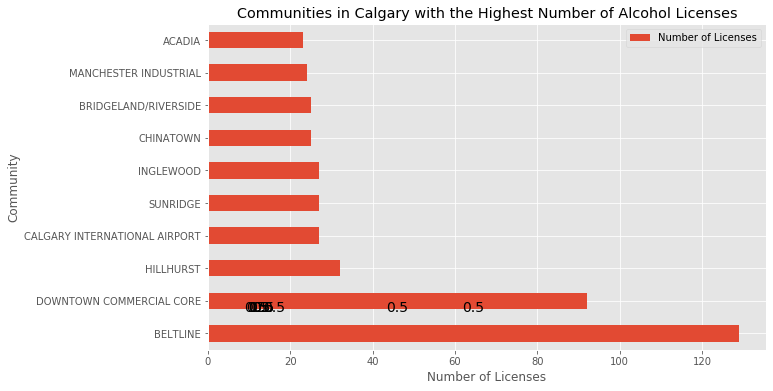

In [1591]:
YYC_liq = YYC_liq_top10[['Number of Licenses']]

YYC_liq.set_index('Number of Licenses',inplace = True)

ax = YYC_liq_top10.plot(kind='barh', figsize=(10, 6), rot=0)

ax.set_ylabel('Community')
ax.set_xlabel('Number of Licenses')
ax.set_title('Communities in Calgary with the Highest Number of Alcohol Licenses')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [1592]:
YYC_liq_low10 = YYC_liq_ordered.iloc[179:189]
YYC_liq_low10

,Number of Licenses
Community,
COLLINGWOOD,1
BAYVIEW,1
CORNERSTONE,1
CHRISTIE PARK,1
COUGAR RIDGE,1
DEER RUN,1
BONAVISTA DOWNS,1
ELBOW PARK,1
ERLTON,1


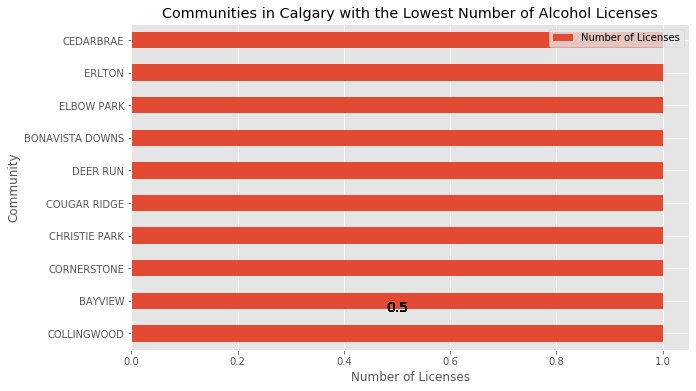

In [1593]:
YYC_liq1 = YYC_liq_low10[['Number of Licenses']]

YYC_liq1.set_index('Number of Licenses',inplace = True)

ax = YYC_liq_low10.plot(kind='barh', figsize=(10, 6), rot=0)

ax.set_ylabel('Community')
ax.set_xlabel('Number of Licenses')
ax.set_title('Communities in Calgary with the Lowest Number of Alcohol Licenses')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [1594]:
YYC_liq_df_sorted=YYC_liq_df_sorted.dropna(subset=['Longitude'])

YYC_liq_df_sorted=YYC_liq_df_sorted.dropna(subset=['Latitude'])

In [1595]:
# Calgary latitude and longitude values
latitude = 51.04
longitude = -114.07

# define Calgary map 
Calgary_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(YYC_liq_df_sorted['Latitude'], YYC_liq_df_sorted['Longitude'], YYC_liq_df_sorted['Community']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Calgary_map)  
    
Calgary_map
# display Calgary map
Calgary_map

In [1597]:
YYC_liq_df1=YYC_liq_df.drop(YYC_liq_df.columns[np.r_[1,2,3,4,5]], axis=1)
YYC_liq_df1.head()

,Tradename,Longitude,Latitude
31,ZYN THE WINE MARKET,-114.027838,51.036524
40,CELLAR (THE),-114.065148,51.045335
65,SOBEYS SPIRITS WINE COLD BEER CRANSTON,-113.976173,50.880257
188,SOMERSET LIQUOR STORE,-114.090439,50.903410
212,BSW LIQUOR AVIATION,-114.030416,51.096781


## Clustering Calgary Communities on the basis of Alcohol Beverage Licenses 

In [1598]:
YYC_liq_df1=YYC_liq_df1.dropna(subset=['Longitude'])

YYC_liq_df1=YYC_liq_df1.dropna(subset=['Latitude'])

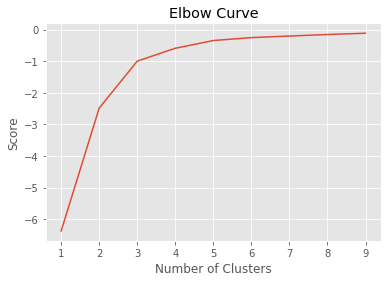

In [1599]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = YYC_liq_df1[['Latitude']]
X_axis = YYC_liq_df1[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [1607]:
calgary_grouped_clustering = YYC_liq_df1.drop('Tradename', 1)
calgary_grouped_clustering=calgary_grouped_clustering.dropna(subset=['Longitude'])
calgary_grouped_clustering=calgary_grouped_clustering.dropna(subset=['Latitude'])

#K means Clustering 
def doKmeans(X, nclust=8):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(calgary_grouped_clustering, 8)
kmeans = pd.DataFrame(clust_labels)
calgary_grouped_clustering.insert((calgary_grouped_clustering.shape[1]),'kmeans',kmeans)
            


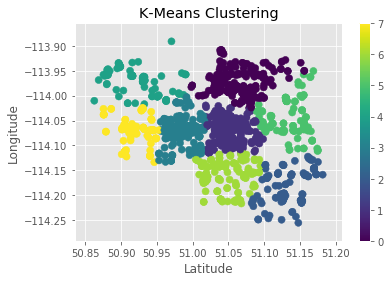

In [1665]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(calgary_grouped_clustering['Latitude'], calgary_grouped_clustering['Longitude'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.colorbar(scatter)

In [1628]:

calgary_grouped_clustering.loc[calgary_grouped_clustering['kmeans'] == 0, calgary_grouped_clustering.columns[[0] + list(range(1, calgary_grouped_clustering.shape[1]))]]
calgary_grouped_clustering["Cluster Labels"] = clust_labels
calgary_grouped_clustering.head(10)



,Longitude,Latitude,kmeans,Cluster Labels
31,-114.027838,51.036524,6.0,1
40,-114.065148,51.045335,0.0,1
65,-113.976173,50.880257,2.0,4
188,-114.090439,50.903410,1.0,7
212,-114.030416,51.096781,5.0,5
260,-114.211493,51.041271,7.0,6
266,-114.146726,51.101784,0.0,2
271,-114.145965,51.077951,1.0,6
272,-113.963079,50.930416,0.0,4
306,-113.955757,51.098806,1.0,0


In [1612]:
calgary_merged = pd.merge(YYC_liq_df_sorted,calgary_grouped_clustering)
calgary_merged

,Tradename,Address,License Type,Community,Status,Established,Longitude,Latitude,kmeans,Cluster Labels
0,ABLO (ABBEYDALE),822 68 ST NE,LIQUOR STORE,ABBEYDALE,Pending Renewal,08/21/2017 12:00:00 AM,-113.934380,51.059158,NaN,0
1,ABBEYDALE COMMUNITY,821 ABBEYDALE DR NE,ALCOHOL BEVERAGE SALES (RESTAURANT),ABBEYDALE,Renewal Licensed,02/05/1999 12:00:00 AM,-113.932329,51.059753,NaN,0
2,CHINE LEGENDARY HOT POT & NOODLES,8971 BONAVENTURE DR SE,ALCOHOL BEVERAGE SALES (RESTAURANT),ACADIA,Renewal Licensed,09/13/2017 12:00:00 AM,-114.069514,50.973351,NaN,3
3,MUCHO BURRITO FAIRMOUNT DRIVE,#130 9825 FAIRMOUNT DR SE,ALCOHOL BEVERAGE SALES (RESTAURANT),ACADIA,Renewal Licensed,04/03/2019 12:00:00 AM,-114.059242,50.964289,NaN,3
4,GOLDEN GATE RESTAURANT,#14 430 ACADIA DR SE,ALCOHOL BEVERAGE SALES (RESTAURANT),ACADIA,Renewal Licensed,07/15/2013 12:00:00 AM,-114.047913,50.969766,NaN,3
...,...,...,...,...,...,...,...,...,...,...
1996,PATISSERIE DU SOLIEL,#309 2525 WOODVIEW DR SW,ALCOHOL BEVERAGE SALES (RESTAURANT),WOODBINE,Renewal Licensed,06/03/2010 12:00:00 AM,-114.121133,50.940540,NaN,7
1997,WOODBINE B K LIQUOR STORE,#C 464 WOODBINE BV SW,LIQUOR STORE,WOODBINE,Renewal Licensed,03/30/2005 12:00:00 AM,-114.133474,50.946462,NaN,7
1998,ACE LIQUOR DISCOUNTER AT WOODBINE,#204 2525 WOODVIEW DR SW,LIQUOR STORE,WOODBINE,Pending Renewal,09/21/2004 12:00:00 AM,-114.120083,50.940327,NaN,7
1999,WOODPARK LIQUOR STORE,#14 523 WOODPARK BV SW,LIQUOR STORE,WOODLANDS,Renewal Licensed,06/04/2007 12:00:00 AM,-114.109716,50.940752,NaN,7


In [1658]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 0, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
0,ABLO (ABBEYDALE),822 68 ST NE,ABBEYDALE,0,08/21/2017 12:00:00 AM,-113.934380,51.059158,NaN,0
1,ABBEYDALE COMMUNITY,821 ABBEYDALE DR NE,ABBEYDALE,0,02/05/1999 12:00:00 AM,-113.932329,51.059753,NaN,0
27,CALGARY CO-OP WINES & SPIRITS - FOREST LAWN,#1A 3200 17 AV SE,ALBERT PARK/RADISSON HEIGHTS,0,10/20/2009 12:00:00 AM,-113.989140,51.038891,NaN,0
28,LA BEER STOP,#115 3608 17 AV SE,ALBERT PARK/RADISSON HEIGHTS,0,03/08/2004 12:00:00 AM,-113.982770,51.038372,NaN,0
29,AMBASSADOR RESTAURANT & BAR,3504D 17 AV SE,ALBERT PARK/RADISSON HEIGHTS,0,07/02/2019 12:00:00 AM,-113.984301,51.038157,NaN,0
...,...,...,...,...,...,...,...,...,...
1959,PHO 36,#7 135 WHITEFIELD DR NE,WHITEHORN,0,12/06/2013 12:00:00 AM,-113.980673,51.087927,NaN,0
1960,PHO 36,#7 135 WHITEFIELD DR NE,WHITEHORN,0,12/06/2013 12:00:00 AM,-113.980673,51.087927,NaN,0
1961,WHITEHORN VILLAGE RETIREMENT COMMUNITY,#1000 5200 44 AV NE,WHITEHORN,0,10/15/2002 12:00:00 AM,-113.959776,51.092676,0.0,0
1962,WHITEHORN LIQUOR STORE,#9 4525 52 ST NE,WHITEHORN,0,03/08/2002 12:00:00 AM,-113.959226,51.091792,NaN,0


In [1669]:
cluster_1=calgary_merged.loc[calgary_merged['Cluster Labels'] == 1, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]
cluster_1

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
38,CROWFOOT WINE & SPIRITS - ALTADORE,#103 3505 14 ST SW,ALTADORE,1,04/20/2015 12:00:00 AM,-114.095096,51.022851,NaN,1
42,LIQUOR DEPOT AT ALTADORE,3504 19 ST SW,ALTADORE,1,06/06/2006 12:00:00 AM,-114.106115,51.022974,NaN,1
43,MARDA LOOP BREWING COMPANY,3523 18 ST SW,ALTADORE,1,05/07/2018 12:00:00 AM,-114.105086,51.022274,NaN,1
44,ZYN THE WINE MARKET,#100 1543 17 AV SE,ALYTH/BONNYBROOK,1,11/03/2008 12:00:00 AM,-114.027838,51.036524,6.0,1
45,CRAZY HORSE BAR & GRILL,#1 4068 OGDEN RD SE,ALYTH/BONNYBROOK,1,12/11/2018 12:00:00 AM,-114.023237,51.018837,NaN,1
...,...,...,...,...,...,...,...,...,...
1990,TRANSCANADA LIQUOR,428 16 AV NE,WINSTON HEIGHTS/MOUNTVIEW,1,12/13/2001 12:00:00 AM,-114.054768,51.067241,NaN,1
1991,EASTERN FORTUNE RESTAURANT,416 16 AV NE,WINSTON HEIGHTS/MOUNTVIEW,1,08/07/2015 12:00:00 AM,-114.055134,51.067140,NaN,1
1992,CAREWEST DR VERNON FANNING CENTRE,722 16 AV NE,WINSTON HEIGHTS/MOUNTVIEW,1,03/09/1998 12:00:00 AM,-114.045537,51.067280,NaN,1
1993,BUZZ BUDDY LIQUOR,2418A EDMONTON TR NE,WINSTON HEIGHTS/MOUNTVIEW,1,11/03/2015 12:00:00 AM,-114.055881,51.074076,NaN,1


In [1615]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 2, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
52,CALIFORNIA THAI,#410 20 CROWFOOT CR NW,ARBOUR LAKE,2,07/07/2014 12:00:00 AM,-114.198607,51.125666,NaN,2
53,LIQUOR TOWN,37 CROWFOOT RI NW,ARBOUR LAKE,2,07/12/2018 12:00:00 AM,-114.210920,51.126039,NaN,2
54,CROWFOOT SAFEWAY WINE & SPIRITS,65 CROWFOOT CR NW,ARBOUR LAKE,2,09/20/2013 12:00:00 AM,-114.200647,51.125260,NaN,2
55,CALGARY CO-OP WINES & SPIRITS,39 CROWFOOT WY NW,ARBOUR LAKE,2,10/26/2010 12:00:00 AM,-114.200590,51.124539,NaN,2
56,NEW DYNASTY SEAFOOD RESTAURANT,#201 150 CROWFOOT CR NW,ARBOUR LAKE,2,10/07/1994 12:00:00 AM,-114.196097,51.128023,NaN,2
...,...,...,...,...,...,...,...,...,...
1893,SILVER SPRINGS GOLF & COUNTRY CLUB,1600 VARSITY ESTATES DR NW,VARSITY,2,10/07/1994 12:00:00 AM,-114.168365,51.097192,NaN,2
1895,GARDEN CAFE & THE FIRESIDE LOUNGE,40 VARSITY ESTATES CI NW,VARSITY,2,12/13/2017 12:00:00 AM,-114.163027,51.103075,NaN,2
1896,SNOW PALACE,#1B 5403 CROWCHILD TR NW,VARSITY,2,08/27/2014 12:00:00 AM,-114.165327,51.103909,NaN,2
1899,1977730 ALBERTA,#210 5403 CROWCHILD TR NW,VARSITY,2,06/24/2016 12:00:00 AM,-114.165390,51.103861,NaN,2


In [1616]:
cluster_3=calgary_merged.loc[calgary_merged['Cluster Labels'] == 3, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]
cluster_3

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
2,CHINE LEGENDARY HOT POT & NOODLES,8971 BONAVENTURE DR SE,ACADIA,3,09/13/2017 12:00:00 AM,-114.069514,50.973351,NaN,3
3,MUCHO BURRITO FAIRMOUNT DRIVE,#130 9825 FAIRMOUNT DR SE,ACADIA,3,04/03/2019 12:00:00 AM,-114.059242,50.964289,NaN,3
4,GOLDEN GATE RESTAURANT,#14 430 ACADIA DR SE,ACADIA,3,07/15/2013 12:00:00 AM,-114.047913,50.969766,NaN,3
5,GOLDEN GATE RESTAURANT,#14 430 ACADIA DR SE,ACADIA,3,07/15/2013 12:00:00 AM,-114.047913,50.969766,NaN,3
6,A B C LIQUOR STORE,#24 430 ACADIA DR SE,ACADIA,3,06/20/2007 12:00:00 AM,-114.047913,50.969766,NaN,3
...,...,...,...,...,...,...,...,...,...
1980,CARL'S JR.,#100 5211 MACLEOD TR SW,WINDSOR PARK,3,12/12/2016 12:00:00 AM,-114.068729,51.008451,NaN,3
1981,SHANGSHANGQIAN,#106 5211 MACLEOD TR SW,WINDSOR PARK,3,10/17/2019 12:00:00 AM,-114.069117,51.008146,NaN,3
1982,BROWNS SOCIALHOUSE - BRITANNIA,5139 ELBOW DR SW,WINDSOR PARK,3,10/29/2014 12:00:00 AM,-114.081725,51.007998,NaN,3
1983,BLUE OCEAN VIETNAMESE RESTAURANT,#105 5809 MACLEOD TR SW,WINDSOR PARK,3,11/09/2015 12:00:00 AM,-114.072544,51.002000,NaN,3


In [1617]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 4, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
83,AUBURN HEIGHTS RETIREMENT RESIDENCE,21 AUBURN BAY ST SE,AUBURN BAY,4,02/08/2018 12:00:00 AM,-113.950619,50.884219,NaN,4
84,CO-OP WINE SPIRITS BEER #26 - AUBURN BAY,#310 100 AUBURN MEADOWS DR SE,AUBURN BAY,4,09/21/2016 12:00:00 AM,-113.945533,50.894710,NaN,4
574,ACE LIQUOR DISCOUNTER AT COPPERPOND,#209 151 COPPERPOND BV SE,COPPERFIELD,4,06/07/2019 12:00:00 AM,-113.932166,50.924095,NaN,4
575,ACE LIQUOR DISCOUNTER AT COPPERFIELD,#107 10 COPPERSTONE ST SE,COPPERFIELD,4,06/07/2019 12:00:00 AM,-113.933652,50.915757,2.0,4
576,STAR LIQUOR & WINE BOUTIQUE,#242 15566 MCIVOR BV SE,COPPERFIELD,4,07/28/2005 12:00:00 AM,-113.950129,50.912690,NaN,4
...,...,...,...,...,...,...,...,...,...
1633,MOROCCAN TENT,#210 11566 24 ST SE,SHEPARD INDUSTRIAL,4,04/15/2019 12:00:00 AM,-114.001743,50.950990,NaN,4
1634,MOROCCAN TENT,#210 11566 24 ST SE,SHEPARD INDUSTRIAL,4,04/15/2019 12:00:00 AM,-114.001743,50.950990,NaN,4
1635,RICKY'S ALL DAY GRILL,#658 11520 24 ST SE,SHEPARD INDUSTRIAL,4,09/19/2017 12:00:00 AM,-114.000512,50.952666,NaN,4
1636,RALLY POINTE,11511 35 ST SE,SHEPARD INDUSTRIAL,4,01/10/2007 12:00:00 AM,-113.985855,50.947604,5.0,4


In [1618]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 5, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
85,BOWLS KOREAN BBQ,#1301 9650 HARVEST HILLS BV NE,AURORA BUSINESS PARK,5,12/05/2016 12:00:00 AM,-114.070102,51.141029,NaN,5
86,SHIKHA,9665 AURORA PARK LI NE,AURORA BUSINESS PARK,5,07/08/2019 12:00:00 AM,-114.060440,51.140181,1.0,5
87,SHIKHA,9665 AURORA PARK LI NE,AURORA BUSINESS PARK,5,07/08/2019 12:00:00 AM,-114.060440,51.140181,NaN,5
88,EXECUTIVE RESIDENCY BY BEST WESTERN,9665 AURORA PARK LI NE,AURORA BUSINESS PARK,5,09/16/2019 12:00:00 AM,-114.060440,51.140181,1.0,5
89,EXECUTIVE RESIDENCY BY BEST WESTERN,9665 AURORA PARK LI NE,AURORA BUSINESS PARK,5,09/16/2019 12:00:00 AM,-114.060440,51.140181,NaN,5
...,...,...,...,...,...,...,...,...,...
1844,THORNCLIFFE GREENVIEW COMMUNITY,5600 CENTRE ST NE,THORNCLIFFE,5,11/03/1999 12:00:00 AM,-114.061685,51.101493,0.0,5
1845,SAFEWAY LIQUOR THORNCLIFFE,5611 4 ST NW,THORNCLIFFE,5,09/20/2013 12:00:00 AM,-114.072682,51.101941,NaN,5
1846,B K LIQUOR STORE #3,5608 4 ST NW,THORNCLIFFE,5,01/04/2006 12:00:00 AM,-114.071216,51.101585,NaN,5
1847,TOPS PIZZA,#7 5602 4 ST NW,THORNCLIFFE,5,12/11/1997 12:00:00 AM,-114.070688,51.101338,NaN,5


In [1619]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 6, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
74,DINER DELUXE - ASPEN LANDING,#104 350 ASPEN GLEN LD SW,ASPEN WOODS,6,02/24/2014 12:00:00 AM,-114.209141,51.039819,NaN,6
75,MUCHO BURRITO,#132 306 ASPEN GLEN LD SW,ASPEN WOODS,6,03/06/2012 12:00:00 AM,-114.207776,51.039102,NaN,6
76,KABUKU,#2136 10 ASPEN STONE BV SW,ASPEN WOODS,6,12/11/2013 12:00:00 AM,-114.212613,51.041447,NaN,6
77,AMICA ASPEN WOODS,10 ASPENSHIRE DR SW,ASPEN WOODS,6,08/01/2013 12:00:00 AM,-114.212292,51.048945,NaN,6
78,ALLORA RESTAURANT,#114 326 ASPEN GLEN LD SW,ASPEN WOODS,6,05/18/2010 12:00:00 AM,-114.208549,51.039363,NaN,6
...,...,...,...,...,...,...,...,...,...
1937,NIRVANA NAIL BAR,#3001 873 85 ST SW,WEST SPRINGS,6,12/16/2016 12:00:00 AM,-114.212448,51.059875,NaN,6
1938,CALGARY CO-OP WINES & SPIRITS - WEST SPRINGS,#600 917 85 ST SW,WEST SPRINGS,6,10/20/2009 12:00:00 AM,-114.211434,51.058033,NaN,6
1939,"BOARDWALK FRIES, BURGERS, SHAKES",#1005 873 85 ST SW,WEST SPRINGS,6,02/22/2017 12:00:00 AM,-114.211585,51.059900,NaN,6
1940,722 WORLD BIER HAUS RESTAURANT & LOUNGE,#601 722 85 ST SW,WEST SPRINGS,6,03/06/2015 12:00:00 AM,-114.209675,51.066158,NaN,6


In [1659]:
cluster_7=calgary_merged.loc[calgary_merged['Cluster Labels'] == 7, calgary_merged.columns[[0,1,3,9] + list(range(5, calgary_merged.shape[1]))]]
cluster_7

,Tradename,Address,Community,Cluster Labels,Established,Longitude,Latitude,kmeans,Cluster Labels
335,MAGIC BOWL CHINESE EATERY,#12 1215 LAKE SYLVAN DR SE,BONAVISTA DOWNS,7,04/21/2003 12:00:00 AM,-114.032358,50.942236,NaN,7
389,SOBEYS WESTERN CELLARS BRIDLEWOOD,#803 2335 162 AV SW,BRIDLEWOOD,7,09/08/2003 12:00:00 AM,-114.112970,50.906207,NaN,7
390,LI-AO SUSHI,#231 2335 162 AV SW,BRIDLEWOOD,7,08/10/2011 12:00:00 AM,-114.111723,50.905289,NaN,7
391,BROTHER'S TASTE OF ASIA,#223 2335 162 AV SW,BRIDLEWOOD,7,03/14/2011 12:00:00 AM,-114.111903,50.905290,NaN,7
392,STAR LIQUOR & WINE BOUTIQUE,#20 2525 BRIDLECREST WY SW,BRIDLEWOOD,7,08/28/2014 12:00:00 AM,-114.117654,50.900949,NaN,7
...,...,...,...,...,...,...,...,...,...
1996,PATISSERIE DU SOLIEL,#309 2525 WOODVIEW DR SW,WOODBINE,7,06/03/2010 12:00:00 AM,-114.121133,50.940540,NaN,7
1997,WOODBINE B K LIQUOR STORE,#C 464 WOODBINE BV SW,WOODBINE,7,03/30/2005 12:00:00 AM,-114.133474,50.946462,NaN,7
1998,ACE LIQUOR DISCOUNTER AT WOODBINE,#204 2525 WOODVIEW DR SW,WOODBINE,7,09/21/2004 12:00:00 AM,-114.120083,50.940327,NaN,7
1999,WOODPARK LIQUOR STORE,#14 523 WOODPARK BV SW,WOODLANDS,7,06/04/2007 12:00:00 AM,-114.109716,50.940752,NaN,7


In [1667]:
# Cluster 7 latitude and longitude values
latitude = 51.04
longitude = -114.07

# define Calgary map 
Calgary_map1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(cluster_7['Latitude'], cluster_7['Longitude'], cluster_7['Community']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Calgary_map1)  
    
Calgary_map1
# display Calgary map
Calgary_map1



In [1671]:
# Cluster 1 latitude and longitude values
latitude = 51.04
longitude = -114.07

# define Calgary map 
Calgary_map2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(cluster_1['Latitude'], cluster_1['Longitude'], cluster_1['Community']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Calgary_map2)  
    
Calgary_map2
# display Calgary map
Calgary_map2


